# FCC Calorimeter Performance Studies Workflow

## Overview

This tutorial will teach you how to:

* **simulate** the single particle response of the calorimeter detector system
* **reconstruct** physics object from raw signals
* produce **plots** of energy resolutions and other quantities.

First, make sure your setup of the FCC software is working. 
You can check that the command to run jobs in the Gaudi framework is available on the command line:

In [1]:
!which fccrun

/usr/local/scripts//fccrun


If you don't see a valid path like `/usr/local/bin/fccrun`  you should consult [the documentation page on FCCSW setup](https://github.com/vvolkl/fcc-tutorials/blob/master/FccSoftwareGettingStarted.md)

## Using the DD4hep detector model in FCC Software.

The Geant4 geometry is used for the full simulation of the detector is not written directly, but generated using the DD4hep library.
The detector description in this library consists of two parts:
A compiled C++ library that constructs the geometry, and a set of xml files that contain parameters that can are parsed by the library at runtime and make the detector geometry (somewhat) configurable.
In the framework, the geometry is available to all components via the service `GeoSvc`.
One of the simplest jobs is to write the geometry to a `.gdml` file:

In [2]:
%%writefile dumpGeo_fccee.py

import os
from Gaudi.Configuration import *
from Configurables import GeoSvc
geoservice = GeoSvc("GeoSvc")
geoservice.detectors=[
	os.path.join(os.environ.get("FCC_DETECTORS", ""), 'Detector/DetFCCeeIDEA/compact/FCCee_DectEmptyMaster.xml'),
  os.path.join(os.environ.get("FCC_DETECTORS", ""), 'Detector/DetFCCeeIDEA/compact/FCCee_DectMaster.xml'),
                                         ]

from Configurables import SimG4Svc
geantservice = SimG4Svc("SimG4Svc")

from Configurables import GeoToGdmlDumpSvc
geodumpservice = GeoToGdmlDumpSvc("GeoDump") 
geodumpservice.gdml="FCCee_IDEA.gdml"

from Configurables import ApplicationMgr
ApplicationMgr( TopAlg = [], 
                EvtSel = 'NONE',
                EvtMax   = 1,
                # order is important, as GeoSvc is needed by SimG4Svc
                ExtSvc = [geoservice, geantservice, geodumpservice],
                OutputLevel=DEBUG
 )


Overwriting dumpGeo_fccee.py


A job with this configuration can be executed with 

In [3]:
!fccrun dumpGeo_fccee.py

 

JobOptionsSvc       DEBUG Service base class initialized successfully
MessageSvc          DEBUG Service base class initialized successfully
ApplicationMgr      DEBUG Getting my own properties
ApplicationMgr    SUCCESS 
                                                   Welcome to ApplicationMgr (GaudiCoreSvc v32r0)
                                          running on vali-XPS-13-9360 on Thu Sep 12 15:39:27 2019
ApplicationMgr      DEBUG Loading declared DLL's

**************************************************************
 Geant4 version Name: geant4-10-04-patch-02 [MT]   (25-May-2018)
                       Copyright : Geant4 Collaboration
                      References : NIM A 506 (2003), 250-303
                                 : IEEE-TNS 53 (2006), 270-278
                                 : NIM A 835 (2016), 186-225
                             WWW : http://geant4.org/
**************************************************************

ApplicationMgr       INFO Application Manager

DD4hep_Beampipe  INFO       125     900      15  28.175      16  29.175       1       0                   tube_FirstConeBe      Beryllium
setVisAttributes DEBUG Set color 1188 [FF,B2,7F] DrawingStyle:    Solid LineStyle: Solid for volume tube_FirstConeBe_wall
setVisAttributes DEBUG Set color 1188 [FF,B2,7F] DrawingStyle:    Solid LineStyle: Solid for volume tube_FirstConeBe_wall2
setVisAttributes DEBUG Set color   0 [FF,FF,FF] DrawingStyle:    Solid LineStyle: Solid for volume tube_FirstConeBe
setVisAttributes DEBUG Set color   0 [FF,FF,FF] DrawingStyle:    Solid LineStyle: Solid for volume tube_FirstConeBe
setVisAttributes DEBUG Set color   3 [00,FF,00] DrawingStyle:    Solid LineStyle: Solid for volume BeBeampipe_assembly
Compact          INFO  ++ Converted subdetector:BeBeampipe of type DD4hep_Beampipe_o1_v01 
DD4hep           DEBUG +++ Detector: Added detector BeBeampipe to the world instance.
DD4hep_Beampipe  DEBUG Creating Beampipe
Utilities        INFO  +++ setDetectorTypeFlags 

Geant4Converter  DEBUG ++ Successessfully converted shape [0x55fd97d3c750] of type:TGeoBBox to G4Box.
Geant4Converter  DEBUG ++ Successessfully converted shape [0x55fd97eb9690] of type:TGeoBBox to G4Box.
Geant4Converter  DEBUG ++ Successessfully converted shape [0x55fd97d3eb70] of type:TGeoTubeSeg to G4Tubs.
Geant4Converter  DEBUG ++ Successessfully converted shape [0x55fd97eb97d0] of type:TGeoTubeSeg to G4Tubs.
Geant4Converter  DEBUG ++ Successessfully converted shape [0x55fd97eb9900] of type:TGeoTubeSeg to G4Tubs.
Geant4Converter  DEBUG ++ Successessfully converted shape [0x55fd97eb9a70] of type:TGeoTubeSeg to G4Tubs.
Geant4Converter  DEBUG ++ Successessfully converted shape [0x55fd97542e30] of type:TGeoHype to G4Hype.
Geant4Converter  DEBUG ++ Successessfully converted shape [0x55fd96dd01f0] of type:TGeoConeSeg to G4Cons.
Geant4Converter  DEBUG ++ Successessfully converted shape [0x55fd96dd0310] of type:TGeoTubeSeg to G4Tubs.
Geant4Converter  DEBUG ++ Successessfully converted shape

Geant4VolumeManager DEBUG +++     Chain: Node OK: component1_1 [component1_1]
Geant4VolumeManager DEBUG +++     Chain: Node OK: VertexEndcap_assembly_1 /VertexEndcap_assembly_1/SiVertexEndcapModule4_54 -> av_8_impr_1_SiVertexEndcapModule4_pv_54
Geant4VolumeManager DEBUG +++     Chain: Node OK: Vertex_12 [Vertex_12]
Geant4VolumeManager DEBUG +++     Chain: Node OK: world_volume_1 [world_volume_1]
Geant4VolumeManager DEBUG +++     Volume  IDs:system=2,2 [0,5] side=1,1 [5,2] layer=3,3 [7,6] module=0,0 [13,11] sensor=3,3 [24,8] 
Geant4VolumeManager DEBUG +++     Map 00000000030001A2 to Geant4 Path:/Vertex_12/av_8_impr_1_SiVertexEndcapModule4_pv_54/component1_1
Geant4VolumeManager DEBUG +++ Add path:/world_volume_1/Vertex_12/VertexEndcap_assembly_1/SiVertexEndcapModule4_55/component1_1 vid:00000000040001E2
Geant4VolumeManager DEBUG +++     Chain: Node OK: component1_1 [component1_1]
Geant4VolumeManager DEBUG +++     Chain: Node OK: VertexEndcap_assembly_1 /VertexEndcap_assembly_1/SiVertexEn

### Adding tracking cuts for neutron  TimeCut(ns)= 10000  KinEnergyCut(MeV)= 0
even though it appears in the current tracking world.
Default cuts are used for this region.
even though it appears in the current tracking world.
Default cuts are used for this region.
SimG4Svc             INFO Random numbers seeds: 1234567	140399174667424

phot:   for  gamma    SubType= 12  BuildTable= 0
      LambdaPrime table from 200 keV to 100 TeV in 61 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric :  Emin=        0 eV    Emax=      100 TeV   AngularGenSauterGavrila  FluoActive

compt:   for  gamma    SubType= 13  BuildTable= 1
      Lambda table from 100 eV  to 1 MeV, 7 bins per decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 56 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
       Klein-Nishina :  Emin=        0 eV    Emax=      100 TeV

conv:   for  gamma    SubType= 14  BuildTable= 1
      Lambda 

        WentzelVIUni :  Emin=        0 eV    Emax=      100 TeV  Table with 84 bins Emin=    100 eV    Emax=    100 TeV

hIoni:   for  anti_proton    SubType= 2
      dE/dx and range tables from 100 eV  to 100 TeV in 84 bins
      Lambda tables from threshold to 100 TeV, 7 bins per decade, spline: 1
      finalRange(mm)= 0.1, dRoverRange= 0.2, integral: 1, fluct: 1, linLossLimit= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
            ICRU73QO :  Emin=        0 eV    Emax=        2 MeV
          BetheBloch :  Emin=        2 MeV   Emax=      100 TeV

hBrems:   for  anti_proton    SubType= 3
      dE/dx and range tables from 100 eV  to 100 TeV in 84 bins
      Lambda tables from threshold to 100 TeV, 7 bins per decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem :  Emin=        0 eV    Emax=      100 TeV

hPairProd:   for  anti_proton    SubType= 4
      dE/dx and range tables from 100 eV  to 100 

      dE/dx and range tables from 100 eV  to 100 TeV in 84 bins
      Lambda tables from threshold to 100 TeV, 7 bins per decade, spline: 1
      Sampling table 21x1001; from 1 GeV to 100 TeV 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
          muPairProd :  Emin=        0 eV    Emax=      100 TeV

CoulombScat:   for  mu-, integral: 1     SubType= 1  BuildTable= 1
      Used Lambda table of mu+
      ThetaMin(p) < Theta(degree) < 180; pLimit(GeV^1)= 0.139531
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
  eCoulombScattering :  Emin=        0 eV    Emax=      100 TeV

msc:   for pi+    SubType= 10
      RangeFactor= 0.2, stepLimitType: 0, latDisplacement: 0
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
        WentzelVIUni :  Emin=        0 eV    Emax=      100 TeV  Table with 84 bins Emin=    100 eV    Emax=    100 TeV

hIoni:   for  pi+    SubType= 2
      dE/dx and range tables from 100 eV  to 100 TeV i

ServiceManager      DEBUG Initializing service GeoDump
GeoDump             DEBUG Service base class initialized successfully
======       Pre-compound/De-excitation Physics Parameters     ========
Type of pre-compound inverse x-section              3
Pre-compound model active                           1
Pre-compound low energy (MeV)                       0.1
Type of de-excitation inverse x-section             3
Type of de-excitation factory                       Evaporation
Number of de-excitation channels                    8
Min excitation energy (keV)                         0.01
Min energy per nucleon for multifragmentation (MeV) 1e+05
Level density (1/MeV)                               0.1
Time limit for long lived isomeres (ns)             1e+12
Internal e- conversion flag                         1
Store e- internal conversion data                   0
Electron internal conversion ID                     2
Correlated gamma emission flag                      0
Max 2J for sampling of

Note the printout of the GeoSvc and make sure the information is as expected. If there is something unclear or missing make sure to open an [issue](https://github.com/HEP-FCC/FCCSW/issues)!
Take a look at the resulting gdml file. Although it is text-based it is not really human-readable for a geometry of this size, but you can check the number of lines and volume names if you are familiar with the geometry.

In [4]:
!tail FCCee_IDEA.gdml

        <volumeref ref="Vertex0x558ba55e92d0"/>
      </physvol>
    </volume>
  </structure>

  <setup name="Default" version="1.0">
    <world ref="world_volume0x558ba55e94b0"/>
  </setup>

</gdml>


In [5]:
# count occurences of "physvol"
!grep -c "<physvol" FCCee_IDEA.gdml

717


## Running Geant4 within the FCC Software Framework

To run Geant4, a number of additional components are required, foremost the `SimG4Alg` and `SimG4Svc`.
The simplest way to generate a particle to simulate is to use one of the particle guns (`GenAlg` with the `MomentumRangeParticleGun` tool for example).
This algorithm produces a particles with energies from a flat probability distribution in HepMC format.
To use them as input they first need to be converted to the FCC event data model (`HepMCToEDMConverter`) and piped into the Geant4 interface via the `SimG4PrimariesFromEdmTool`.

A configuration that runs all of this is distributed with FCCSW and can be run with the following command:

(This simulates the response of 5GeV electrons which makes for modest shower sizes and should produce 500 events in around 2 minutes)


In [10]:
!export FCCSWBASEDIR=/home/vali/repo/FCCSW; export FCC_DETECTORS=/home/vali/repo/FCCSW;time fccrun  $FCCSWBASEDIR/Reconstruction/RecFCCeeCalorimeter/options/runCaloSim.py --filename fccee_idea_LAr_pgun.root -n 500 

 -->  SimG4Alg  -->  CreateECalBarrelCellsStep1  -->  positionsBarrelEcal  -->  ReSegmentationEcal  -->  CreateECalBarrelCells  -->  out  

ApplicationMgr    SUCCESS 
                                                   Welcome to ApplicationMgr (GaudiCoreSvc v32r0)
                                          running on vali-XPS-13-9360 on Thu Sep 12 16:09:43 2019

**************************************************************
 Geant4 version Name: geant4-10-04-patch-02 [MT]   (25-May-2018)
                       Copyright : Geant4 Collaboration
                      References : NIM A 506 (2003), 250-303
                                 : IEEE-TNS 53 (2006), 270-278
                                 : NIM A 835 (2016), 186-225
                             WWW : http://geant4.org/
**************************************************************

ApplicationMgr       INFO Application Manager Configured successfully
GeoSvc               INFO loading geometry from file:  '/home/vali/repo/FCCSW/D

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67852ff70
registerObject arguments: /Event	/ECalBarrelHits	0x55b678530100
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6784e2840
registerObject arguments: /Event	/ECalBarrelPositions	0x55b6784e2a50
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b67868f160
registerObject arguments: /Event	/ECalBarrelCells	0x55b678699ff0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.21754 2.63494
registerObject arguments: /Event	/GenParticles	0x55b678530430
registerObject arguments: /Event	/GenVertices	0x55b6785303a0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678530310
registerObject arguments: /Event	/ECalBarrelHits	0x55b6785302d0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6786c2fe0
registerO

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678955c30
registerObject arguments: /Event	/ECalBarrelHits	0x55b6787562e0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678af55f0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678af5630
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b678bea030
registerObject arguments: /Event	/ECalBarrelCells	0x55b678bf26c0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.0715063 0.244958
registerObject arguments: /Event	/GenParticles	0x55b678756cf0
registerObject arguments: /Event	/GenVertices	0x55b6785ae3b0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678b54d80
registerObject arguments: /Event	/ECalBarrelHits	0x55b6787544b0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6786040e0
regist

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678695c20
registerObject arguments: /Event	/ECalBarrelHits	0x55b678b79ae0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678c9c3e0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678c9c470
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b678cfcab0
registerObject arguments: /Event	/ECalBarrelCells	0x55b678d04080
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.0164372 1.12035
registerObject arguments: /Event	/GenParticles	0x55b678753ab0
registerObject arguments: /Event	/GenVertices	0x55b678753990
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678681880
registerObject arguments: /Event	/ECalBarrelHits	0x55b678695a80
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678d05960
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678c8e500
registerObject arguments: /Event	/ECalBarrelHits	0x55b67875c740
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678e82e90
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678e82f20
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b678e94a90
registerObject arguments: /Event	/ECalBarrelCells	0x55b678e9ce70
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.249773 5.07255
registerObject arguments: /Event	/GenParticles	0x55b67875b3e0
registerObject arguments: /Event	/GenVertices	0x55b67875b3a0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67859edb0
registerObject arguments: /Event	/ECalBarrelHits	0x55b678c15c90
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678d7f620
registerO

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b6786944e0
registerObject arguments: /Event	/ECalBarrelHits	0x55b678663580
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678da81f0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678da8230
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b6785c86f0
registerObject arguments: /Event	/ECalBarrelCells	0x55b678f86d90
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.117466 5.56392
registerObject arguments: /Event	/GenParticles	0x55b678c1e770
registerObject arguments: /Event	/GenVertices	0x55b678e8f600
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678c1e7b0
registerObject arguments: /Event	/ECalBarrelHits	0x55b678c171f0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b67858b160
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678f02e00
registerObject arguments: /Event	/ECalBarrelHits	0x55b67875c700
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678c8cd10
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678c8cd50
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b678b96f50
registerObject arguments: /Event	/ECalBarrelCells	0x55b678c57700
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.120025 0.176503
registerObject arguments: /Event	/GenParticles	0x55b6786944e0
registerObject arguments: /Event	/GenVertices	0x55b6789bb630
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678754e80
registerObject arguments: /Event	/ECalBarrelHits	0x55b678f73330
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b67883e160
registe

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678d79880
registerObject arguments: /Event	/ECalBarrelHits	0x55b678754e80
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6790ff8a0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b6790ff930
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b67914cf50
registerObject arguments: /Event	/ECalBarrelCells	0x55b679155130
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.0972939 2.87686
registerObject arguments: /Event	/GenParticles	0x55b678c171f0
registerObject arguments: /Event	/GenVertices	0x55b67906b560
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678ffdae0
registerObject arguments: /Event	/ECalBarrelHits	0x55b678b75200
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6790f3fd0
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b679045a00
registerObject arguments: /Event	/ECalBarrelHits	0x55b67916f2a0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678b3c3e0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678b3c420
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b6791fc2d0
registerObject arguments: /Event	/ECalBarrelCells	0x55b67912ad70
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.244355 2.00215
registerObject arguments: /Event	/GenParticles	0x55b678fb94a0
registerObject arguments: /Event	/GenVertices	0x55b6791942c0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b6790332b0
registerObject arguments: /Event	/ECalBarrelHits	0x55b679169630
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6791297c0
registerO

SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.0388207 0.968387
registerObject arguments: /Event	/GenParticles	0x55b67919ef10
registerObject arguments: /Event	/GenVertices	0x55b678e52a80
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678e52280
registerObject arguments: /Event	/ECalBarrelHits	0x55b679031e50
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b67898f920
registerObject arguments: /Event	/ECalBarrelPositions	0x55b67898f960
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b6791c7da0
registerObject arguments: /Event	/ECalBarrelCells	0x55b679262a00
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG parti

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678f65410
registerObject arguments: /Event	/ECalBarrelHits	0x55b6792dfd20
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6792b44c0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b6792b4500
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b679332bb0
registerObject arguments: /Event	/ECalBarrelCells	0x55b67933a730
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.0761427 1.30759
registerObject arguments: /Event	/GenParticles	0x55b678a00470
registerObject arguments: /Event	/GenVertices	0x55b6792d4680
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678755850
registerObject arguments: /Event	/ECalBarrelHits	0x55b67926c8c0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6793424a0
registe

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678b95210
registerObject arguments: /Event	/ECalBarrelHits	0x55b679265320
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6785f3230
registerObject arguments: /Event	/ECalBarrelPositions	0x55b6785f3270
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b67868e790
registerObject arguments: /Event	/ECalBarrelCells	0x55b6792de2f0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.0426752 5.93243
registerObject arguments: /Event	/GenParticles	0x55b6791cfa20
registerObject arguments: /Event	/GenVertices	0x55b6792dfcd0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b6790b7e50
registerObject arguments: /Event	/ECalBarrelHits	0x55b678755850
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b67938f4b0
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b679290330
registerObject arguments: /Event	/ECalBarrelHits	0x55b6793a5380
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b679370960
registerObject arguments: /Event	/ECalBarrelPositions	0x55b6793709a0
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b679370a30
registerObject arguments: /Event	/ECalBarrelCells	0x55b67921e5c0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.102232 4.98236
registerObject arguments: /Event	/GenParticles	0x55b6793a52c0
registerObject arguments: /Event	/GenVertices	0x55b67906e8a0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b6793761b0
registerObject arguments: /Event	/ECalBarrelHits	0x55b67935c220
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678b915f0
registerO

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67937e630
registerObject arguments: /Event	/ECalBarrelHits	0x55b678efa030
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6793c7400
registerObject arguments: /Event	/ECalBarrelPositions	0x55b6790a4390
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b6794668c0
registerObject arguments: /Event	/ECalBarrelCells	0x55b679487900
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.162451 1.39597
registerObject arguments: /Event	/GenParticles	0x55b6793a9740
registerObject arguments: /Event	/GenVertices	0x55b67945d7e0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b6793a5360
registerObject arguments: /Event	/ECalBarrelHits	0x55b679245f20
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678f12170
registerO

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b679011fd0
registerObject arguments: /Event	/ECalBarrelHits	0x55b6793a5220
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6794c41c0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b6794c4200
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b6794d7120
registerObject arguments: /Event	/ECalBarrelCells	0x55b6794de590
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.147046 4.94602
registerObject arguments: /Event	/GenParticles	0x55b679345970
registerObject arguments: /Event	/GenVertices	0x55b678f14a30
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678a010e0
registerObject arguments: /Event	/ECalBarrelHits	0x55b679148ea0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6794aebe0
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b679502d70
registerObject arguments: /Event	/ECalBarrelHits	0x55b679148ea0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6789a7f60
registerObject arguments: /Event	/ECalBarrelPositions	0x55b6789a7fa0
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b6794f8ce0
registerObject arguments: /Event	/ECalBarrelCells	0x55b6794d8650
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.0417627 5.50092
registerObject arguments: /Event	/GenParticles	0x55b679011f90
registerObject arguments: /Event	/GenVertices	0x55b679193a90
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b679193a50
registerObject arguments: /Event	/ECalBarrelHits	0x55b6793f0c30
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6794e53c0
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678f14a30
registerObject arguments: /Event	/ECalBarrelHits	0x55b6794c0cc0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678fe5af0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678fe5b30
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b6795377f0
registerObject arguments: /Event	/ECalBarrelCells	0x55b678aaad80
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.217875 2.49649
registerObject arguments: /Event	/GenParticles	0x55b679011fd0
registerObject arguments: /Event	/GenVertices	0x55b6794143d0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b679548db0
registerObject arguments: /Event	/ECalBarrelHits	0x55b678d79690
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b679336a20
registerO

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b6794e5da0
registerObject arguments: /Event	/ECalBarrelHits	0x55b679011fd0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6790d7ee0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b6790d7f20
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b678b4b1b0
registerObject arguments: /Event	/ECalBarrelCells	0x55b6790a9ad0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.15256 4.04398
registerObject arguments: /Event	/GenParticles	0x55b679544fb0
registerObject arguments: /Event	/GenVertices	0x55b6794c0cc0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b6793a5220
registerObject arguments: /Event	/ECalBarrelHits	0x55b679523510
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6794f0bd0
registerO

SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.140723 4.32667
registerObject arguments: /Event	/GenParticles	0x55b679011fd0
registerObject arguments: /Event	/GenVertices	0x55b678e0f4d0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b6794f9b20
registerObject arguments: /Event	/ECalBarrelHits	0x55b6791e7660
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678f155f0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678f15630
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b67925b770
registerObject arguments: /Event	/ECalBarrelCells	0x55b679033b40
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG partic

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678629410
registerObject arguments: /Event	/ECalBarrelHits	0x55b679165ac0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678efce50
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678efce90
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b678a537d0
registerObject arguments: /Event	/ECalBarrelCells	0x55b6789b2b80
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.105186 2.51098
registerObject arguments: /Event	/GenParticles	0x55b678a7f7a0
registerObject arguments: /Event	/GenVertices	0x55b678a83240
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678a84430
registerObject arguments: /Event	/ECalBarrelHits	0x55b678b187f0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b67890f980
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678c951f0
registerObject arguments: /Event	/ECalBarrelHits	0x55b67893ddf0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678d3d260
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678d3d2a0
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b6794f0bd0
registerObject arguments: /Event	/ECalBarrelCells	0x55b678a552f0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.295334 1.22844
registerObject arguments: /Event	/GenParticles	0x55b6782b4ec0
registerObject arguments: /Event	/GenVertices	0x55b6783e7990
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678b18990
registerObject arguments: /Event	/ECalBarrelHits	0x55b679512930
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6795d9a30
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b6792f8240
registerObject arguments: /Event	/ECalBarrelHits	0x55b6794bd1a0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6791c03c0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b67912ffc0
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b6793d39f0
registerObject arguments: /Event	/ECalBarrelCells	0x55b6794cfde0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.19328 5.36414
registerObject arguments: /Event	/GenParticles	0x55b678b18990
registerObject arguments: /Event	/GenVertices	0x55b678b187f0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678a70200
registerObject arguments: /Event	/ECalBarrelHits	0x55b678aa2b00
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678da8d30
registerOb

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b6795fd400
registerObject arguments: /Event	/ECalBarrelHits	0x55b678a38d60
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6785eb870
registerObject arguments: /Event	/ECalBarrelPositions	0x55b6785eb920
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b67849b710
registerObject arguments: /Event	/ECalBarrelCells	0x55b679614ae0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.0524143 2.76074
registerObject arguments: /Event	/GenParticles	0x55b679162780
registerObject arguments: /Event	/GenVertices	0x55b67936f6c0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678bf5f50
registerObject arguments: /Event	/ECalBarrelHits	0x55b6791aa5f0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678f3d540
registe

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678a010e0
registerObject arguments: /Event	/ECalBarrelHits	0x55b6788e2950
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678df60e0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678df6120
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b679623ec0
registerObject arguments: /Event	/ECalBarrelCells	0x55b6792012c0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.0049713 3.67095
registerObject arguments: /Event	/GenParticles	0x55b6788e29f0
registerObject arguments: /Event	/GenVertices	0x55b678abcdc0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67961c770
registerObject arguments: /Event	/ECalBarrelHits	0x55b678a34760
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6785ea9a0
registe

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678ac2720
registerObject arguments: /Event	/ECalBarrelHits	0x55b679523510
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b679545210
registerObject arguments: /Event	/ECalBarrelPositions	0x55b6795452a0
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b679643900
registerObject arguments: /Event	/ECalBarrelCells	0x55b679099060
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.229413 5.36579
registerObject arguments: /Event	/GenParticles	0x55b678b18990
registerObject arguments: /Event	/GenVertices	0x55b67961c770
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678a84430
registerObject arguments: /Event	/ECalBarrelHits	0x55b6788e29f0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6785c8890
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67961c770
registerObject arguments: /Event	/ECalBarrelHits	0x55b67889d3d0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6785eb2f0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b6785eb370
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b6785eb470
registerObject arguments: /Event	/ECalBarrelCells	0x55b6793791c0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.21708 0.525026
registerObject arguments: /Event	/GenParticles	0x55b6788a46a0
registerObject arguments: /Event	/GenVertices	0x55b6790cc5c0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678917c20
registerObject arguments: /Event	/ECalBarrelHits	0x55b67875fcc0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6793a6420
registerO

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b6790cc7a0
registerObject arguments: /Event	/ECalBarrelHits	0x55b6795e8b70
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678638420
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678638460
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b6786384a0
registerObject arguments: /Event	/ECalBarrelCells	0x55b6791c7360
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.265251 0.668875
registerObject arguments: /Event	/GenParticles	0x55b67922ea30
registerObject arguments: /Event	/GenVertices	0x55b6795c77f0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678860a00
registerObject arguments: /Event	/ECalBarrelHits	0x55b6788a6280
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6787002a0
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678efa090
registerObject arguments: /Event	/ECalBarrelHits	0x55b678ae08a0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b679348da0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b679348de0
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b67d05c140
registerObject arguments: /Event	/ECalBarrelCells	0x55b6786fa6c0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.131511 3.37113
registerObject arguments: /Event	/GenParticles	0x55b678926690
registerObject arguments: /Event	/GenVertices	0x55b678b18990
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678ed8f20
registerObject arguments: /Event	/ECalBarrelHits	0x55b6788e29f0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678b8db20
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67961c770
registerObject arguments: /Event	/ECalBarrelHits	0x55b6795e8bd0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6790af8e0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b6790af920
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b6790af9b0
registerObject arguments: /Event	/ECalBarrelCells	0x55b678e83760
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.167743 0.0481038
registerObject arguments: /Event	/GenParticles	0x55b6789f3b50
registerObject arguments: /Event	/GenVertices	0x55b679541ce0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b6785eb870
registerObject arguments: /Event	/ECalBarrelHits	0x55b679231380
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678fd41c0
regist

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678b18990
registerObject arguments: /Event	/ECalBarrelHits	0x55b678f0c260
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b67937be60
registerObject arguments: /Event	/ECalBarrelPositions	0x55b67937bea0
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b67d08fcb0
registerObject arguments: /Event	/ECalBarrelCells	0x55b6794ea270
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.128121 0.612924
registerObject arguments: /Event	/GenParticles	0x55b679231380
registerObject arguments: /Event	/GenVertices	0x55b67889d3d0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67875fcc0
registerObject arguments: /Event	/ECalBarrelHits	0x55b6792cd890
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6795c5e10
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678c9e560
registerObject arguments: /Event	/ECalBarrelHits	0x55b6790bf230
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b67893fab0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b67893fb10
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b67893fb70
registerObject arguments: /Event	/ECalBarrelCells	0x55b678a998e0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.0333139 3.26845
registerObject arguments: /Event	/GenParticles	0x55b67951dbf0
registerObject arguments: /Event	/GenVertices	0x55b678a34a20
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b679640c00
registerObject arguments: /Event	/ECalBarrelHits	0x55b67d08b040
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6792d8300
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678cd5890
registerObject arguments: /Event	/ECalBarrelHits	0x55b679610e80
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6794eb8a0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b6794eb930
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b6794eba60
registerObject arguments: /Event	/ECalBarrelCells	0x55b6793f87a0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.237602 4.89713
registerObject arguments: /Event	/GenParticles	0x55b67961c770
registerObject arguments: /Event	/GenVertices	0x55b6790a82a0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67893ddf0
registerObject arguments: /Event	/ECalBarrelHits	0x55b67d08b040
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6784de520
registerO

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678eb02a0
registerObject arguments: /Event	/ECalBarrelHits	0x55b679165ac0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6790361e0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b679036270
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b67d0d3b20
registerObject arguments: /Event	/ECalBarrelCells	0x55b678b4b130
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.0155346 0.849078
registerObject arguments: /Event	/GenParticles	0x55b6790bf230
registerObject arguments: /Event	/GenVertices	0x55b678b18990
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b6795fd4c0
registerObject arguments: /Event	/ECalBarrelHits	0x55b678a998e0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b679143ad0
registe

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67d0fe320
registerObject arguments: /Event	/ECalBarrelHits	0x55b67960e300
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678ceabf0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678ceac30
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b67d0f3e60
registerObject arguments: /Event	/ECalBarrelCells	0x55b6786f4870
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.288788 1.33416
registerObject arguments: /Event	/GenParticles	0x55b67d0d4c10
registerObject arguments: /Event	/GenVertices	0x55b67d0d4bd0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b6793c05a0
registerObject arguments: /Event	/ECalBarrelHits	0x55b678ceac30
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b679603dc0
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b6791b6440
registerObject arguments: /Event	/ECalBarrelHits	0x55b67d0fe620
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678603c90
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678a6c5e0
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b67d109860
registerObject arguments: /Event	/ECalBarrelCells	0x55b67963d3d0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.18215 6.0058
registerObject arguments: /Event	/GenParticles	0x55b67d0d4bd0
registerObject arguments: /Event	/GenVertices	0x55b678565100
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67d0de960
registerObject arguments: /Event	/ECalBarrelHits	0x55b6785c08b0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678835ad0
registerObj

SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.245394 6.11947
registerObject arguments: /Event	/GenParticles	0x55b67d0fe300
registerObject arguments: /Event	/GenVertices	0x55b67861ac40
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67861ac00
registerObject arguments: /Event	/ECalBarrelHits	0x55b6791b6400
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678dcbac0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678dcbb00
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b678dcbc80
registerObject arguments: /Event	/ECalBarrelCells	0x55b678f743b0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG partic

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678766b10
registerObject arguments: /Event	/ECalBarrelHits	0x55b67d08ce50
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678c28ff0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678c29080
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b67926efa0
registerObject arguments: /Event	/ECalBarrelCells	0x55b67d0ff840
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.170816 2.65126
registerObject arguments: /Event	/GenParticles	0x55b67d0d4c30
registerObject arguments: /Event	/GenVertices	0x55b6788e2b30
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678903c40
registerObject arguments: /Event	/ECalBarrelHits	0x55b678e90460
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6789a7de0
registerO

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67d096ea0
registerObject arguments: /Event	/ECalBarrelHits	0x55b67d0fe300
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678f3d500
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678f3d540
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b6795ffab0
registerObject arguments: /Event	/ECalBarrelCells	0x55b67d0866a0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.203855 0.822754
registerObject arguments: /Event	/GenParticles	0x55b6788e2b30
registerObject arguments: /Event	/GenVertices	0x55b6794cefd0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67960e300
registerObject arguments: /Event	/ECalBarrelHits	0x55b678932540
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b679078db0
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67d0d7140
registerObject arguments: /Event	/ECalBarrelHits	0x55b6788ecfd0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b67d05f080
registerObject arguments: /Event	/ECalBarrelPositions	0x55b67d05f0c0
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b6788cef80
registerObject arguments: /Event	/ECalBarrelCells	0x55b679201350
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.176286 5.08388
registerObject arguments: /Event	/GenParticles	0x55b6788d0000
registerObject arguments: /Event	/GenVertices	0x55b6794d2b40
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67d09dc00
registerObject arguments: /Event	/ECalBarrelHits	0x55b678abab00
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b67d0a5a10
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b6794d3130
registerObject arguments: /Event	/ECalBarrelHits	0x55b678932540
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678565510
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678565550
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b678ab9d80
registerObject arguments: /Event	/ECalBarrelCells	0x55b67d115140
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.290106 0.146487
registerObject arguments: /Event	/GenParticles	0x55b679647930
registerObject arguments: /Event	/GenVertices	0x55b678abcde0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b679113190
registerObject arguments: /Event	/ECalBarrelHits	0x55b678a8ffa0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678f47760
registe

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67d11b220
registerObject arguments: /Event	/ECalBarrelHits	0x55b67d096ea0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6793f8760
registerObject arguments: /Event	/ECalBarrelPositions	0x55b6793f87a0
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b67d11dc20
registerObject arguments: /Event	/ECalBarrelCells	0x55b678d83bd0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.125698 3.54291
registerObject arguments: /Event	/GenParticles	0x55b6793a6500
registerObject arguments: /Event	/GenVertices	0x55b6793363f0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67d0fe680
registerObject arguments: /Event	/ECalBarrelHits	0x55b67d0de960
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6789a1cd0
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b679123560
registerObject arguments: /Event	/ECalBarrelHits	0x55b6791bcfc0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678ec6cf0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678ec6d80
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b678b63b50
registerObject arguments: /Event	/ECalBarrelCells	0x55b678ddb770
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.0135711 3.58497
registerObject arguments: /Event	/GenParticles	0x55b679082770
registerObject arguments: /Event	/GenVertices	0x55b6790362c0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678ce9190
registerObject arguments: /Event	/ECalBarrelHits	0x55b6792635d0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6791346f0
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b6788d02e0
registerObject arguments: /Event	/ECalBarrelHits	0x55b67d0e4a90
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6785833a0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b6785833e0
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b67d12af00
registerObject arguments: /Event	/ECalBarrelCells	0x55b6789a7da0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.211036 1.27892
registerObject arguments: /Event	/GenParticles	0x55b67d12f710
registerObject arguments: /Event	/GenVertices	0x55b679123560
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678903c40
registerObject arguments: /Event	/ECalBarrelHits	0x55b6795fd520
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678c9c4d0
registerO

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678766b10
registerObject arguments: /Event	/ECalBarrelHits	0x55b67d12f710
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6788eb2a0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b6788eb2e0
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b6794d62a0
registerObject arguments: /Event	/ECalBarrelCells	0x55b679157e00
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.156191 5.90207
registerObject arguments: /Event	/GenParticles	0x55b6788d02e0
registerObject arguments: /Event	/GenVertices	0x55b67d129ae0
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678e9d820
registerObject arguments: /Event	/ECalBarrelHits	0x55b6785e0f70
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b67868e470
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67d0d7140
registerObject arguments: /Event	/ECalBarrelHits	0x55b6791bcfc0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6794317e0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b679431870
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b67d187ad0
registerObject arguments: /Event	/ECalBarrelCells	0x55b678f692e0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = 0.270304 3.93096
registerObject arguments: /Event	/GenParticles	0x55b6792546f0
registerObject arguments: /Event	/GenVertices	0x55b6795fd520
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b678c677c0
registerObject arguments: /Event	/ECalBarrelHits	0x55b67d17bd30
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678b88160
registerO

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67d13f2f0
registerObject arguments: /Event	/ECalBarrelHits	0x55b678766b10
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678df83b0
registerObject arguments: /Event	/ECalBarrelPositions	0x55b678df83f0
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b67d140b60
registerObject arguments: /Event	/ECalBarrelCells	0x55b67929bce0
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.194772 4.69103
registerObject arguments: /Event	/GenParticles	0x55b678ce9190
registerObject arguments: /Event	/GenVertices	0x55b6790bf190
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b679647930
registerObject arguments: /Event	/ECalBarrelHits	0x55b678aba2c0
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b679655180
register

registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b6792546f0
registerObject arguments: /Event	/ECalBarrelHits	0x55b679123560
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b6785fdd80
registerObject arguments: /Event	/ECalBarrelPositions	0x55b6785fddc0
registerObject arguments: /Event	/ECalBarrelCellsStep2	0x55b679593b70
registerObject arguments: /Event	/ECalBarrelCells	0x55b679612050
SimG4Alg.SimG4S...  DEBUG particle definition 0x55b6722cbdb0 +++  'particleName':e-
SimG4Alg.SimG4S...  DEBUG particle mass = 0.510999
SimG4Alg.SimG4S...  DEBUG particle energy = 5000
SimG4Alg.SimG4S...  DEBUG particle eta, phi  = -0.072704 4.9169
registerObject arguments: /Event	/GenParticles	0x55b6783e84f0
registerObject arguments: /Event	/GenVertices	0x55b67d0d7140
registerObject arguments: /Event	/ECalBarrelPositionedHits	0x55b67d183190
registerObject arguments: /Event	/ECalBarrelHits	0x55b678766b10
registerObject arguments: /Event	/ECalBarrelCellsStep1	0x55b678cf6a10
registerO

136.55user 0.25system 2:16.87elapsed 99%CPU (0avgtext+0avgdata 513780maxresident)k
128inputs+158904outputs (0major+100096minor)pagefaults 0swaps


The output of this job is `fccee_idea_LAr_pgun.root`, a ROOT file containing the simulation products of 500 single particle events (5 Gev e-) in the FCC event data model.
Check for example that the distribution of the input particles is as you expect:

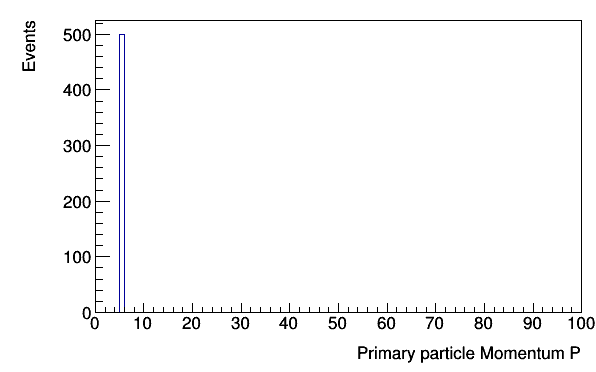

In [6]:
import ROOT
f = ROOT.TFile("fccee_idea_LAr_pgun.root")
events = f.Get("events")
c = ROOT.TCanvas("canvas1", "",600, 400)
h = ROOT.TH1F("h_GenParticles_P", ";Primary particle Momentum P; Events", 100, 0 ,100)
events.Draw("sqrt(pow(GenParticles.core.p4.px,2) + pow(GenParticles.core.p4.py,2) +pow(GenParticles.core.p4.pz,2))>>h_GenParticles_P")
c.Draw()


The exact position of the energy deposit is available too (Note that this collection, which is MCTruth-level information is not usually saved on disk to save space):

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_ECalBarrelPositions_xy


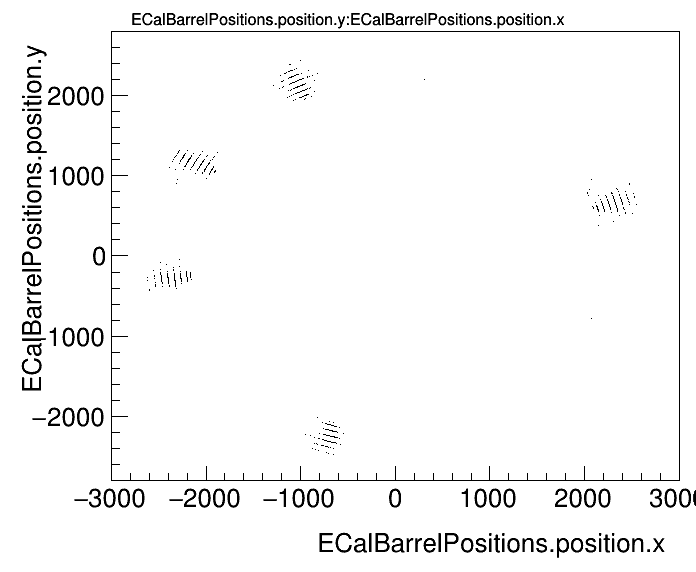

In [10]:
import ROOT
f = ROOT.TFile("fccee_idea_LAr_pgun.root")
events = f.Get("events")

c = ROOT.TCanvas("c_ECalBarrelPositions_xy", "", 700, 600)
# draw hits for first five events
events.Draw("ECalBarrelPositions.position.y:ECalBarrelPositions.position.x", "", "", 5, 0)
c.Draw()

### Obtaining and Plotting the Energy Resolution

Now that the detector response is simulated, it is time to reconstruct the signals. FCCSW includes another configuration to run a Sliding Window reconstruction:

In [32]:
!export FCCSWBASEDIR=/home/vali/repo/FCCSW; export FCC_DETECTORS=/home/vali/repo/FCCSW;fccrun $FCCSWBASEDIR/Reconstruction/RecFCCeeCalorimeter/options/runFullCaloSystem_ReconstructionSW_noiseFromFile.py --input fccee_idea_LAr_pgun.root -n 500 --noiseFileName elecNoise_ecalBarrelFCCee_50Ohm_traces1_4shieldWidth.root --filename output_allCalo_reco_noise.root

 -->  PodioReader  -->  CreateEmptyCaloCells  -->  CreateECalBarrelCells  -->  CreateClusters  -->  out  

ApplicationMgr    SUCCESS 
                                                   Welcome to ApplicationMgr (GaudiCoreSvc v32r0)
                                          running on vali-XPS-13-9360 on Thu Sep 12 16:52:26 2019
ApplicationMgr       INFO Application Manager Configured successfully
GeoSvc               INFO loading geometry from file:  '/home/vali/repo/FCCSW/Detector/DetFCCeeIDEA-LAr/compact/FCCee_DectEmptyMaster.xml'
Detector         WARN  +++ Object 'GlobalTrackerReadoutID' is already defined and new one will be ignored
GeoSvc               INFO loading geometry from file:  '/home/vali/repo/FCCSW/Detector/DetFCCeeECalInclined/compact/FCCee_ECalBarrel_withCryostat.xml'
ECalConstruction     INFO ECAL cryostat: front: rmin (cm) = 203 rmax (cm) = 208 dz (cm) = 221
ECalConstruction     INFO ECAL cryostat: back: rmin (cm) = 272 rmax (cm) = 282 dz (cm) = 221
ECalConstruction 

registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577df551e90
registerObject arguments: /Event	/CaloClusters	0x5577df5520e0
registerObject arguments: /Event	/emptyCaloCells	0x5577e17483a0
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577df551e90
registerObject arguments: /Event	/CaloClusters	0x5577df5520e0
registerObject arguments: /Event	/emptyCaloCells	0x5577e17457c0
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577df551e90
registerObject arguments: /Event	/CaloClusters	0x5577df5520e0
registerObject arguments: /Event	/emptyCaloCells	0x5577e1d09410
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577df5530a0
registerObject arguments: /Event	/CaloClusters	0x5577df5532f0
registerObject arguments: /Event	/emptyCaloCells	0x5577e2198600
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577df5530a0
registerObject arguments: /Event	/CaloClusters	0x5577df5532f0
registerObject arguments: /Event	/emptyCaloCells	0x5577e1745fa0
registerObject argum

registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e59da8b0
registerObject arguments: /Event	/CaloClusters	0x5577e59dab00
registerObject arguments: /Event	/emptyCaloCells	0x5577e2047760
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e59da8b0
registerObject arguments: /Event	/CaloClusters	0x5577e59dab00
registerObject arguments: /Event	/emptyCaloCells	0x5577e2198a10
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e59da8b0
registerObject arguments: /Event	/CaloClusters	0x5577e59dab00
registerObject arguments: /Event	/emptyCaloCells	0x5577e1cf4c80
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e59dbac0
registerObject arguments: /Event	/CaloClusters	0x5577e59dbd10
registerObject arguments: /Event	/emptyCaloCells	0x5577e212a340
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e59dbac0
registerObject arguments: /Event	/CaloClusters	0x5577e59dbd10
registerObject arguments: /Event	/emptyCaloCells	0x5577e2074f60
registerObject argum

registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e5944660
registerObject arguments: /Event	/CaloClusters	0x5577e59448b0
registerObject arguments: /Event	/emptyCaloCells	0x5577e1cc9fc0
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e5944660
registerObject arguments: /Event	/CaloClusters	0x5577e59448b0
registerObject arguments: /Event	/emptyCaloCells	0x5577e2146070
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e5944660
registerObject arguments: /Event	/CaloClusters	0x5577e59448b0
registerObject arguments: /Event	/emptyCaloCells	0x5577e1744260
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e5944660
registerObject arguments: /Event	/CaloClusters	0x5577e59448b0
registerObject arguments: /Event	/emptyCaloCells	0x5577e1911ca0
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e5945870
registerObject arguments: /Event	/CaloClusters	0x5577e5945ac0
registerObject arguments: /Event	/emptyCaloCells	0x5577e1ae9eb0
registerObject argum

registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577ddb8ccc0
registerObject arguments: /Event	/CaloClusters	0x5577ddb8cf10
registerObject arguments: /Event	/emptyCaloCells	0x5577e1747a10
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577ddb8ded0
registerObject arguments: /Event	/CaloClusters	0x5577ddb8e120
registerObject arguments: /Event	/emptyCaloCells	0x5577e18c2590
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577ddb8ded0
registerObject arguments: /Event	/CaloClusters	0x5577ddb8e120
registerObject arguments: /Event	/emptyCaloCells	0x5577e18ff9d0
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577ddb8ded0
registerObject arguments: /Event	/CaloClusters	0x5577ddb8e120
registerObject arguments: /Event	/emptyCaloCells	0x5577e2188bc0
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577ddb8f0e0
registerObject arguments: /Event	/CaloClusters	0x5577ddb8f330
registerObject arguments: /Event	/emptyCaloCells	0x5577e1ae53d0
registerObject argum

registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e62521a0
registerObject arguments: /Event	/CaloClusters	0x5577e62523f0
registerObject arguments: /Event	/emptyCaloCells	0x5577e2198720
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e62533b0
registerObject arguments: /Event	/CaloClusters	0x5577e6253600
registerObject arguments: /Event	/emptyCaloCells	0x5577e1736160
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e62533b0
registerObject arguments: /Event	/CaloClusters	0x5577e6253600
registerObject arguments: /Event	/emptyCaloCells	0x5577e1911ca0
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e62533b0
registerObject arguments: /Event	/CaloClusters	0x5577e6253600
registerObject arguments: /Event	/emptyCaloCells	0x5577e1afe760
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e62533b0
registerObject arguments: /Event	/CaloClusters	0x5577e6253600
registerObject arguments: /Event	/emptyCaloCells	0x5577e212a460
registerObject argum

registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e50dfa30
registerObject arguments: /Event	/CaloClusters	0x5577e50dfc80
registerObject arguments: /Event	/emptyCaloCells	0x5577e1744260
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e50dfa30
registerObject arguments: /Event	/CaloClusters	0x5577e50dfc80
registerObject arguments: /Event	/emptyCaloCells	0x5577e1747080
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e50dfa30
registerObject arguments: /Event	/CaloClusters	0x5577e50dfc80
registerObject arguments: /Event	/emptyCaloCells	0x5577e20f2e80
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e50dfa30
registerObject arguments: /Event	/CaloClusters	0x5577e50dfc80
registerObject arguments: /Event	/emptyCaloCells	0x5577e214cc70
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e50dfa30
registerObject arguments: /Event	/CaloClusters	0x5577e50dfc80
registerObject arguments: /Event	/emptyCaloCells	0x5577e20e7070
registerObject argum

registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577dfaa7870
registerObject arguments: /Event	/CaloClusters	0x5577dfaa7ac0
registerObject arguments: /Event	/emptyCaloCells	0x5577e20d48a0
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577dfaa7870
registerObject arguments: /Event	/CaloClusters	0x5577dfaa7ac0
registerObject arguments: /Event	/emptyCaloCells	0x5577e1ae3300
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577dfaa7870
registerObject arguments: /Event	/CaloClusters	0x5577dfaa7ac0
registerObject arguments: /Event	/emptyCaloCells	0x5577e1738200
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577dfaa7870
registerObject arguments: /Event	/CaloClusters	0x5577dfaa7ac0
registerObject arguments: /Event	/emptyCaloCells	0x5577e17507d0
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577dfaa7870
registerObject arguments: /Event	/CaloClusters	0x5577dfaa7ac0
registerObject arguments: /Event	/emptyCaloCells	0x5577e1e3c960
registerObject argum

registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e0394260
registerObject arguments: /Event	/CaloClusters	0x5577e03944b0
registerObject arguments: /Event	/emptyCaloCells	0x5577e18ad570
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e0395470
registerObject arguments: /Event	/CaloClusters	0x5577e03956c0
registerObject arguments: /Event	/emptyCaloCells	0x5577e174b9a0
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e0395470
registerObject arguments: /Event	/CaloClusters	0x5577e03956c0
registerObject arguments: /Event	/emptyCaloCells	0x5577e2202970
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e0395470
registerObject arguments: /Event	/CaloClusters	0x5577e03956c0
registerObject arguments: /Event	/emptyCaloCells	0x5577e1751160
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e0395470
registerObject arguments: /Event	/CaloClusters	0x5577e03956c0
registerObject arguments: /Event	/emptyCaloCells	0x5577e18ad570
registerObject argum

registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e5a10fd0
registerObject arguments: /Event	/CaloClusters	0x5577e5a11220
registerObject arguments: /Event	/emptyCaloCells	0x5577e1b00a70
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e5a10fd0
registerObject arguments: /Event	/CaloClusters	0x5577e5a11220
registerObject arguments: /Event	/emptyCaloCells	0x5577e210fdb0
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e5a10fd0
registerObject arguments: /Event	/CaloClusters	0x5577e5a11220
registerObject arguments: /Event	/emptyCaloCells	0x5577e17557b0
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e5a10fd0
registerObject arguments: /Event	/CaloClusters	0x5577e5a11220
registerObject arguments: /Event	/emptyCaloCells	0x5577e1a75410
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e5a10fd0
registerObject arguments: /Event	/CaloClusters	0x5577e5a11220
registerObject arguments: /Event	/emptyCaloCells	0x5577e269b750
registerObject argum

registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e14b5aa0
registerObject arguments: /Event	/CaloClusters	0x5577e14b5cf0
registerObject arguments: /Event	/emptyCaloCells	0x5577e2137120
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e14b4890
registerObject arguments: /Event	/CaloClusters	0x5577e14b4ae0
registerObject arguments: /Event	/emptyCaloCells	0x5577e1ea0510
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e14b4890
registerObject arguments: /Event	/CaloClusters	0x5577e14b4ae0
registerObject arguments: /Event	/emptyCaloCells	0x5577e24dd540
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e14b4890
registerObject arguments: /Event	/CaloClusters	0x5577e14b4ae0
registerObject arguments: /Event	/emptyCaloCells	0x5577e1e6ded0
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e14b5aa0
registerObject arguments: /Event	/CaloClusters	0x5577e14b5cf0
registerObject arguments: /Event	/emptyCaloCells	0x5577e1bafcd0
registerObject argum

registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e14bb4f0
registerObject arguments: /Event	/CaloClusters	0x5577e14bb740
registerObject arguments: /Event	/emptyCaloCells	0x5577e2142100
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e14ba2e0
registerObject arguments: /Event	/CaloClusters	0x5577e14ba530
registerObject arguments: /Event	/emptyCaloCells	0x5577e1734a50
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e14bb4f0
registerObject arguments: /Event	/CaloClusters	0x5577e14bb740
registerObject arguments: /Event	/emptyCaloCells	0x5577e2b470d0
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e14bb4f0
registerObject arguments: /Event	/CaloClusters	0x5577e14bb740
registerObject arguments: /Event	/emptyCaloCells	0x5577e2226b10
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e14bb4f0
registerObject arguments: /Event	/CaloClusters	0x5577e14bb740
registerObject arguments: /Event	/emptyCaloCells	0x5577e18c8230
registerObject argum

registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e50e7a90
registerObject arguments: /Event	/CaloClusters	0x5577e50e7ce0
registerObject arguments: /Event	/emptyCaloCells	0x5577e18b7540
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e50e7a90
registerObject arguments: /Event	/CaloClusters	0x5577e50e7ce0
registerObject arguments: /Event	/emptyCaloCells	0x5577e1fa52f0
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e50e7a90
registerObject arguments: /Event	/CaloClusters	0x5577e50e7ce0
registerObject arguments: /Event	/emptyCaloCells	0x5577e206a540
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e50e7a90
registerObject arguments: /Event	/CaloClusters	0x5577e50e7d80
registerObject arguments: /Event	/emptyCaloCells	0x5577e20f7b30
registerObject arguments: /Event	/ECalBarrelCellsNoise	0x5577e50e7d80
registerObject arguments: /Event	/CaloClusters	0x5577e50e8070
registerObject arguments: /Event	/emptyCaloCells	0x5577e20a8f70
registerObject argum

This configuration inludes electronics noise especially calculated for this detector geometry. which is overlayed on the branch `ECalBarrelCells` containing information on all cells in the ECal Barrel.
First, let's visualize the impact of the noise:

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_ECalBarrelCellsNoise_energy
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_ECalBarrelCells_energy


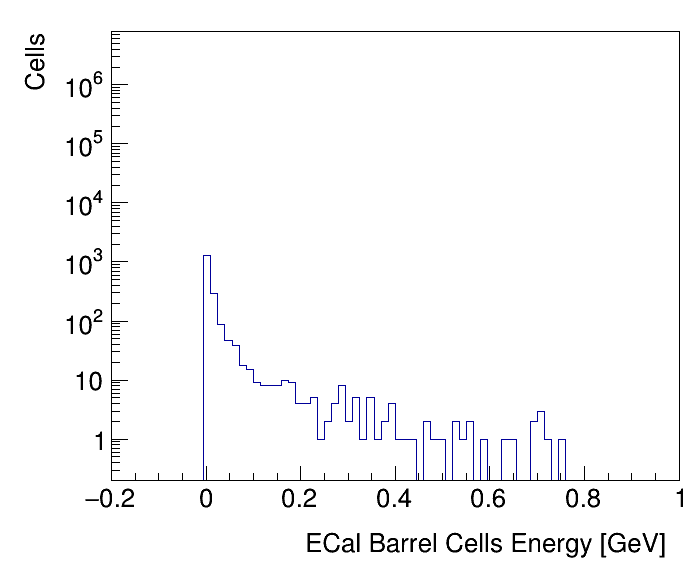

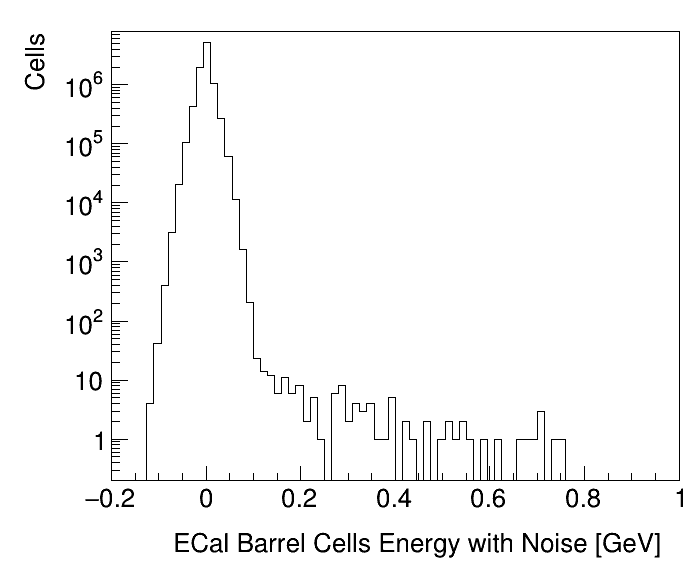

In [33]:
import ROOT
f = ROOT.TFile("output_allCalo_reco_noise.root")
events = f.Get("events")

c = ROOT.TCanvas("c_ECalBarrelCellsNoise_energy", "", 700, 600)

h = ROOT.TH1F("h_ECalBarrelCells_energy", ";ECal Barrel Cells Energy [GeV]; Cells", 80, -0.2 ,1)
events.Draw("ECalBarrelCells.core.energy >> h_ECalBarrelCells_energy", "", "", 10, 0)
h.GetYaxis().SetRangeUser(0.2, 8*10**6)



c.SetLogy()
c.Draw()

c2 = ROOT.TCanvas("c_ECalBarrelCells_energy", "", 700, 600)
#h2 = ROOT.TH1F("h_ECalBarrelCellsNoise_energy", ";ECall Barrel Cells Energy with Noise [GeV]; Events", 80, -0.2 ,1)
h2 = h.Clone("h_ECalBarrelCellsNoise_energy")
h2.SetTitle(";ECal Barrel Cells Energy with Noise [GeV]; Cells")
events.Draw("ECalBarrelCellsNoise.core.energy>> h_ECalBarrelCellsNoise_energy", "", "", 10, 0)
h2.GetYaxis().SetRangeUser(0.2, 8*10**6)
h2.SetLineColor(ROOT.kBlack)


c2.SetLogy()
c2.Draw()

From these plots the impact of the noise becomes clear. Note that the branch `EcalBarrelCellsNoise` is much larger than `ECalBarrelCells`, as all cells that did not record a signal can no longer be ignored, but have to be saved as well due to the presence of noise.

### Extracting and Plotting the Resolution

The root file created by FCCSW also contains the output of the Sliding Window reconstruction in the branch "CaloClusters". Again, we first check the contents:

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_CaloClusters_energy


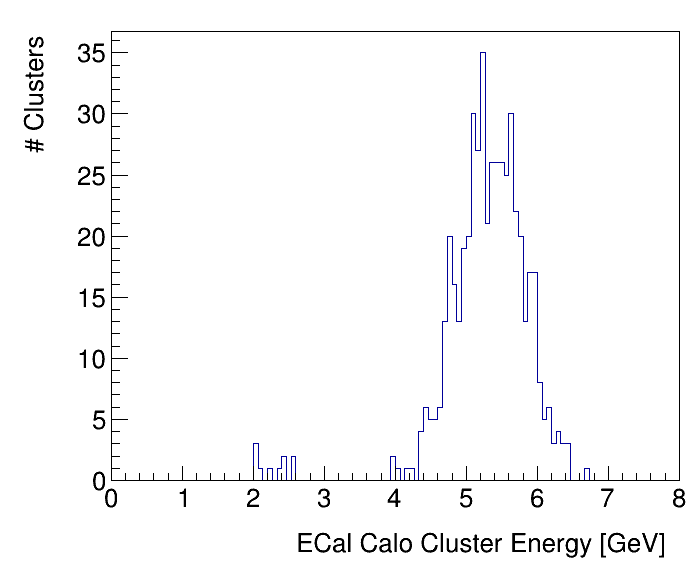

In [41]:
import ROOT
f = ROOT.TFile("output_allCalo_reco_noise.root")
events = f.Get("events")

c = ROOT.TCanvas("c_CaloClusters_energy", "", 700, 600)
hEn = ROOT.TH1F("h_CaloClusters_energy", ";ECal Calo Cluster Energy [GeV]; # Clusters", 120, 0 ,8)
events.Draw("CaloClusters.core.energy >> h_CaloClusters_energy")

c.Draw()


To extract the Calorimeter Performance, we have to fit the reco energy distribution:

mean: 5.35 [GeV]
sigma: 0.46 [GeV]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_CaloClusters_energyFit


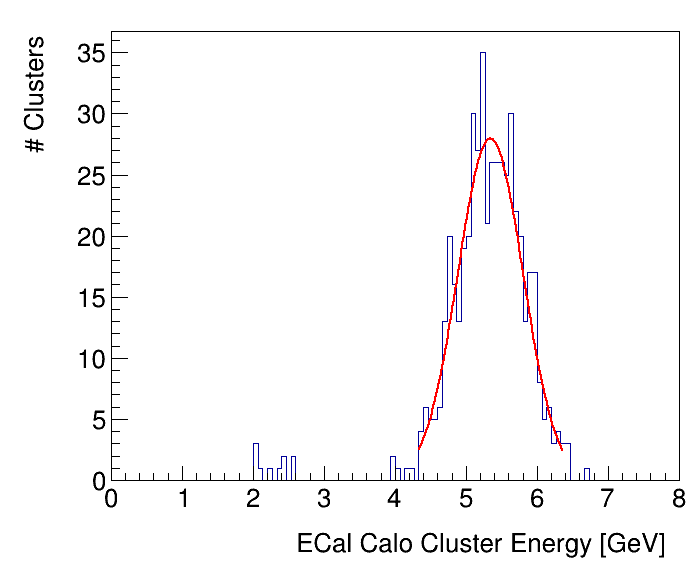

In [51]:

import ROOT
f = ROOT.TFile("output_allCalo_reco_noise.root")
events = f.Get("events")

c = ROOT.TCanvas("c_CaloClusters_energyFit", "", 700, 600)
hEn = ROOT.TH1F("h_CaloClusters_energy", ";ECal Calo Cluster Energy [GeV]; # Clusters", 120, 0 ,8)
events.Draw("CaloClusters.core.energy >> h_CaloClusters_energy")

fitPre = ROOT.TF1("fitPre","gaus", hEn.GetMean() - 1. * hEn.GetRMS(), hEn.GetMean() + 1. * hEn.GetRMS())
resultPre = hEn.Fit(fitPre, "SQRN")
fit = ROOT.TF1("fit","gaus", resultPre.Get().Parameter(1) - 2. * resultPre.Get().Parameter(2), resultPre.Get().Parameter(1) + 2. * resultPre.Get().Parameter(2))
result = hEn.Fit(fit, "SQRN")
mean = result.Get().Parameter(1)
sigma = result.Get().Parameter(2)
dMean = result.Get().Error(1)
dSigma = result.Get().Error(2)
print "mean:", round(mean,2), "[GeV]"
print "sigma:", round(sigma  ,2), "[GeV]"
fit.Draw("SAME")
c.Draw()



### Further Topics: Parametrizing the Energy Resolution 

We are of course interested in the Calorimeter response not only at one energy, but over a range of energies,
and in particular in the usual parametrisation of the resolution:

$$ \frac \sigma_E E \approx  \frac a \sqrt{E} \oplus \frac b E \oplus c  $$,

where a is the "stochastic term", b the "noise term" and c the "constant term" 

This requires a somewhat more complex script. The FCC Calo Group maintains one here: https://github.com/faltovaj/FCC_calo_analysis_cpp/blob/master/scripts/plot_enResolution.py

TODO: Install a modified version of this script that can run on pre-produced samples on eos?




### Further Topics: Calculating the Sampling Fraction and using it in Simulation

As you can see in https://github.com/HEP-FCC/FCCSW/blob/master/Reconstruction/RecFCCeeCalorimeter/options/runCaloSim.py#L112, the simulation already corrected for the sampling fraction of our calorimeter.
These values themselves are taken from simulation and in case you change the geometry they need to be recalculated and updated.

TODO: This will be part of another tutorial. Add link.